# Open temperature files

In [1]:
import iris
import os
import sys

In [5]:
fpath = '/data/share/covid-19/*.nc'
# files = sorted(os.listdir(fpath))
# print(len(files))

In [6]:
fname = '/data/share/covid-19/t1o5m_mean_20200104.nc'

In [8]:
cubes = iris.load(fname)
print(cubes)

0: air_temperature / (K)               (latitude: 1920; longitude: 2560)


In [9]:
cube, = cubes
cube

<iris 'Cube' of air_temperature / (K) (latitude: 1920; longitude: 2560)>

In [6]:
%%time
cubes = iris.load(fpath)

CPU times: user 7.88 s, sys: 981 ms, total: 8.86 s
Wall time: 28.4 s


In [7]:
print(cubes)

0: air_temperature / (K)               (time: 91; latitude: 1920; longitude: 2560)


In [8]:
cube, = cubes
cube

<iris 'Cube' of air_temperature / (K) (time: 91; latitude: 1920; longitude: 2560)>

In [20]:
for coord in cube.coords():
    print(coord.name())
    print(coord.cell(0).point)
    print(coord.points[0])
    print('\n')

time
2020-01-01 11:30:00
438299.5


latitude
-89.953125
-89.953125


longitude
0.0703125
0.0703125


forecast_period
2.5
2.5


height
1.5
1.5


forecast_reference_time
2020-01-01 09:00:00
438297.0




In [23]:
[c.point for c in cube.coord('time').cells()]

[real_datetime(2020, 1, 1, 11, 30),
 real_datetime(2020, 1, 2, 11, 30),
 real_datetime(2020, 1, 3, 11, 30),
 real_datetime(2020, 1, 4, 11, 30),
 real_datetime(2020, 1, 5, 11, 30),
 real_datetime(2020, 1, 6, 11, 30),
 real_datetime(2020, 1, 7, 11, 30),
 real_datetime(2020, 1, 8, 11, 30),
 real_datetime(2020, 1, 9, 11, 30),
 real_datetime(2020, 1, 10, 11, 30),
 real_datetime(2020, 1, 11, 11, 30),
 real_datetime(2020, 1, 12, 11, 30),
 real_datetime(2020, 1, 13, 11, 30),
 real_datetime(2020, 1, 14, 11, 30),
 real_datetime(2020, 1, 15, 11, 30),
 real_datetime(2020, 1, 16, 11, 30),
 real_datetime(2020, 1, 17, 11, 30),
 real_datetime(2020, 1, 18, 11, 30),
 real_datetime(2020, 1, 19, 11, 30),
 real_datetime(2020, 1, 20, 11, 30),
 real_datetime(2020, 1, 21, 11, 30),
 real_datetime(2020, 1, 22, 11, 30),
 real_datetime(2020, 1, 23, 11, 30),
 real_datetime(2020, 1, 24, 11, 30),
 real_datetime(2020, 1, 25, 11, 30),
 real_datetime(2020, 1, 26, 11, 30),
 real_datetime(2020, 1, 27, 11, 30),
 real_date

In [21]:
import pandas as pd

In [27]:
%%time
time = cube.coord('time')
data = {time.name(): [cell.point for cell in time.cells()]}
pd.DataFrame(data)

CPU times: user 74.8 ms, sys: 11.7 ms, total: 86.5 ms
Wall time: 80.8 ms


,time
0,2020-01-01 11:30:00
1,2020-01-02 11:30:00
2,2020-01-03 11:30:00
3,2020-01-04 11:30:00
4,2020-01-05 11:30:00
...,...
86,2020-03-27 11:30:00
87,2020-03-28 11:30:00
88,2020-03-29 11:30:00
89,2020-03-30 11:30:00


In [18]:
cube.lazy_data().nbytes /1e6 #MB

1789.1328

In [19]:
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import iris
import iris.plot as iplt
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np

import shape

In [20]:
cube.coord_system()

GeogCS(6371229.0)

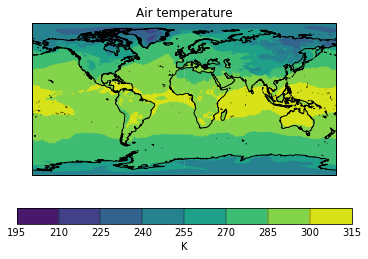

In [21]:
qplt.contourf(cube[0])
plt.gca().coastlines('50m')

### Load shapefile

In [22]:
urban_areas_shp = 'Counties_and_Unitary_Authorities_April_2019_Boundaries_EW_BUC.shp'
urban_areas = shpreader.Reader(urban_areas_shp)

In [24]:
for record in urban_areas.records():
    print(record)

Record(MULTIPOLYGON (((-1.17763328634219 54.6991864051642, -1.17398117675391 54.6918238899294, -1.19632938053034 54.6985649676233, -1.18750965082326 54.6939094540718, -1.19909662654518 54.6805499346807, -1.18279969615044 54.6588044069678, -1.15772382875079 54.6481937607109, -1.16844628689693 54.645620252678, -1.17320740842152 54.6334571767527, -1.18876265284135 54.6326511071375, -1.193189877532 54.6290526367232, -1.20939328414684 54.6216853899463, -1.23421016009636 54.6288778540597, -1.25671733879395 54.6233509242195, -1.29901427298173 54.6279818884868, -1.31636432536428 54.6452348524527, -1.32886363882166 54.6440016092939, -1.33506092900011 54.6313239680584, -1.38089831632363 54.6439170683557, -1.34125422761501 54.6502118986462, -1.34785151195242 54.6624209272144, -1.33094576833901 54.6821336618463, -1.34452598374791 54.6911209127219, -1.31932937291836 54.6913568469572, -1.30132668031215 54.7081010499937, -1.30552089363155 54.7175215633233, -1.2702517668578 54.727168687781, -1.2428395

In [25]:
urban_area_name = 'Manchester'

In [28]:
def get_urban_area_record(shapefile, tgt_urban_area_name):
    '''
    Get the geometries for the specified urban area.
    
    '''
    result = None
    for record in shapefile.records():
        urban_area_name = record.attributes['ctyua19nm']
        if urban_area_name == tgt_urban_area_name:
            result = record
            break
    if result is None:
        emsg = 'Could not find Urban Area with name {}.'
        raise ValueError(emsg.format(tgt_urban_area_name))
    return result

In [29]:
urban_area_record = get_urban_area_record(urban_areas, urban_area_name)
urban_area_record

<Record: <shapely.geometry.multipolygon.MultiPolygon object at 0x7f44879680b8>, {'FID': 60, 'objectid': 59, 'ctyua19cd': 'E08000003', 'ctyua19nm': 'Manchester', 'ctyua19nmw': '', 'bng_e': 384591, 'bng_n': 397063, 'long': -2.23359, 'lat': 53.470089, 'st_areasha': 111895372.049991, 'st_lengths': 69389.3342447621, 'Shape__Are': 315178253.132935, 'Shape__Len': 116452.150090969}, <fields>>

### Extract Data

First use the `extract_subcubes` method.

In [30]:
shape_cutter = shape.Shape(urban_area_record.geometry,
                           urban_area_record.attributes,
                           coord_system=cube.coord_system())

In [31]:
cut_cubes = shape_cutter.extract_subcubes(cubes)
cut_cubes

[<iris 'Cube' of air_temperature / (K) (time: 91; latitude: 4; longitude: 2)>]

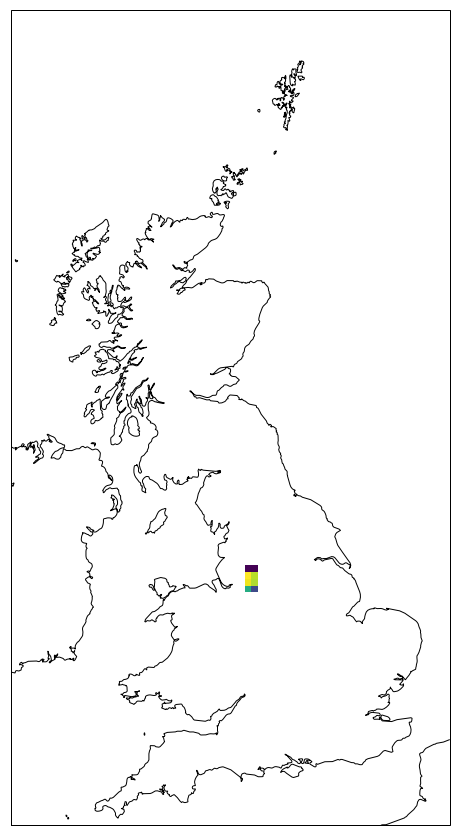

In [37]:
plt.figure(figsize=(10, 15))
ax = plt.axes(projection=ccrs.OSGB())
ax.coastlines('10m')
              
iplt.pcolormesh(cut_cubes[0][0])
ax.add_geometries([urban_area_record.geometry], ccrs.OSGB(),
                  edgecolor='r', facecolor='none')
ax.set_global()

plt.show()

## Calculate temporal average

In [39]:
cut_cube = cut_cubes[0]

In [40]:
cut_cube

<iris 'Cube' of air_temperature / (K) (time: 91; latitude: 4; longitude: 2)>

In [42]:
spat_av = cube.collapsed(['latitude','longitude'], iris.analysis.MEAN)
spat_av

/root/my-conda-envs/cloudreadydata/lib/python3.6/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))


Air Temperature (K),time
Shape,91
Dimension coordinates,
time,x
Auxiliary coordinates,
forecast_reference_time,x
Scalar coordinates,
forecast_period,"2.5 hours, bound=(0.0, 5.0) hours"
height,1.5 m
latitude,"0.0 degrees, bound=(-90.0, 90.0) degrees"
longitude,"180.0 degrees, bound=(0.0, 360.0) degrees"


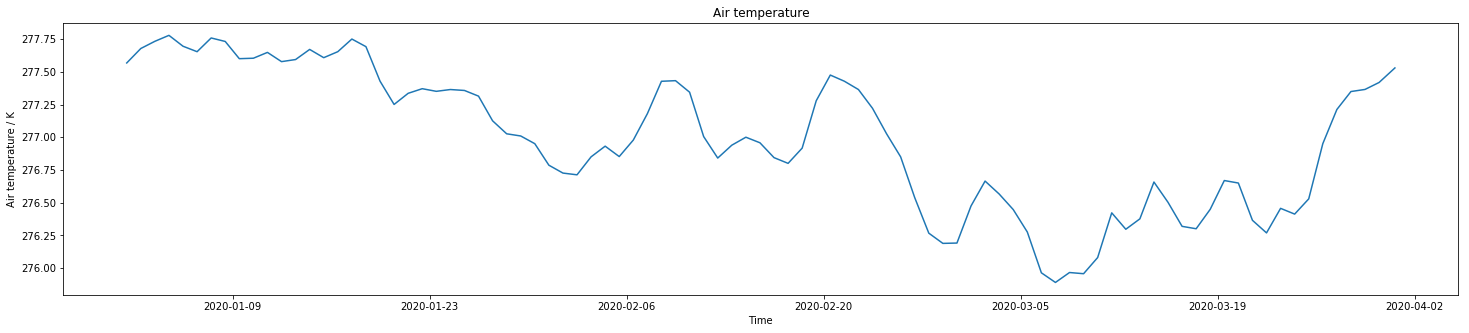

In [69]:
qplt.plot(spat_av)
plt.gcf().set_size_inches(25, 5)
plt.savefig('mean_air_temp_manchester_timeseries.png')

In [44]:
import pandas as pd

In [49]:
time = [cell.point for cell in spat_av.coord('time').cells()]
time

[real_datetime(2020, 1, 1, 11, 30),
 real_datetime(2020, 1, 2, 11, 30),
 real_datetime(2020, 1, 3, 11, 30),
 real_datetime(2020, 1, 4, 11, 30),
 real_datetime(2020, 1, 5, 11, 30),
 real_datetime(2020, 1, 6, 11, 30),
 real_datetime(2020, 1, 7, 11, 30),
 real_datetime(2020, 1, 8, 11, 30),
 real_datetime(2020, 1, 9, 11, 30),
 real_datetime(2020, 1, 10, 11, 30),
 real_datetime(2020, 1, 11, 11, 30),
 real_datetime(2020, 1, 12, 11, 30),
 real_datetime(2020, 1, 13, 11, 30),
 real_datetime(2020, 1, 14, 11, 30),
 real_datetime(2020, 1, 15, 11, 30),
 real_datetime(2020, 1, 16, 11, 30),
 real_datetime(2020, 1, 17, 11, 30),
 real_datetime(2020, 1, 18, 11, 30),
 real_datetime(2020, 1, 19, 11, 30),
 real_datetime(2020, 1, 20, 11, 30),
 real_datetime(2020, 1, 21, 11, 30),
 real_datetime(2020, 1, 22, 11, 30),
 real_datetime(2020, 1, 23, 11, 30),
 real_datetime(2020, 1, 24, 11, 30),
 real_datetime(2020, 1, 25, 11, 30),
 real_datetime(2020, 1, 26, 11, 30),
 real_datetime(2020, 1, 27, 11, 30),
 real_date

In [50]:
temp = spat_av.data
temp

masked_array(data=[277.56772, 277.67825, 277.73325, 277.77875, 277.6956 ,
                   277.65384, 277.7588 , 277.73206, 277.60046, 277.60394,
                   277.64847, 277.5779 , 277.5939 , 277.67117, 277.60812,
                   277.65396, 277.75055, 277.69238, 277.42892, 277.2506 ,
                   277.3358 , 277.37103, 277.35095, 277.3647 , 277.35757,
                   277.3142 , 277.1256 , 277.02634, 277.00958, 276.9507 ,
                   276.78632, 276.7261 , 276.7128 , 276.85022, 276.93173,
                   276.8523 , 276.97842, 277.18015, 277.42767, 277.43243,
                   277.34424, 277.00513, 276.8409 , 276.93927, 277.00027,
                   276.95764, 276.84415, 276.80038, 276.9168 , 277.27893,
                   277.47528, 277.4281 , 277.36462, 277.22116, 277.0262 ,
                   276.84982, 276.5382 , 276.26685, 276.18872, 276.19125,
                   276.4747 , 276.66492, 276.56613, 276.44724, 276.2757 ,
                   275.96384, 275.8901

In [60]:
np.ndarray?

Init signature: np.ndarray(self, /, *args, **kwargs)
Docstring:     
ndarray(shape, dtype=float, buffer=None, offset=0,
        strides=None, order=None)

An array object represents a multidimensional, homogeneous array
of fixed-size items.  An associated data-type object describes the
format of each element in the array (its byte-order, how many bytes it
occupies in memory, whether it is an integer, a floating point number,
or something else, etc.)

Arrays should be constructed using `array`, `zeros` or `empty` (refer
to the See Also section below).  The parameters given here refer to
a low-level method (`ndarray(...)`) for instantiating an array.

For more information, refer to the `numpy` module and examine the
methods and attributes of an array.

Parameters
----------
(for the __new__ method; see Notes below)

shape : tuple of ints
    Shape of created array.
dtype : data-type, optional
    Any object that can be interpreted as a numpy data type.
buffer : object exposing buffer int

In [65]:
data = {'Time':time, 'Air Temperature - Mean (K)':temp}
data

{'Time': [real_datetime(2020, 1, 1, 11, 30),
  real_datetime(2020, 1, 2, 11, 30),
  real_datetime(2020, 1, 3, 11, 30),
  real_datetime(2020, 1, 4, 11, 30),
  real_datetime(2020, 1, 5, 11, 30),
  real_datetime(2020, 1, 6, 11, 30),
  real_datetime(2020, 1, 7, 11, 30),
  real_datetime(2020, 1, 8, 11, 30),
  real_datetime(2020, 1, 9, 11, 30),
  real_datetime(2020, 1, 10, 11, 30),
  real_datetime(2020, 1, 11, 11, 30),
  real_datetime(2020, 1, 12, 11, 30),
  real_datetime(2020, 1, 13, 11, 30),
  real_datetime(2020, 1, 14, 11, 30),
  real_datetime(2020, 1, 15, 11, 30),
  real_datetime(2020, 1, 16, 11, 30),
  real_datetime(2020, 1, 17, 11, 30),
  real_datetime(2020, 1, 18, 11, 30),
  real_datetime(2020, 1, 19, 11, 30),
  real_datetime(2020, 1, 20, 11, 30),
  real_datetime(2020, 1, 21, 11, 30),
  real_datetime(2020, 1, 22, 11, 30),
  real_datetime(2020, 1, 23, 11, 30),
  real_datetime(2020, 1, 24, 11, 30),
  real_datetime(2020, 1, 25, 11, 30),
  real_datetime(2020, 1, 26, 11, 30),
  real_dateti

In [ ]:
data = {coord.name(): coord.data for coord in cube.coords()}
pd.DataFrame(data)

In [66]:
df = pd.DataFrame(data)
df

,Time,Air Temperature - Mean (K)
0,2020-01-01 11:30:00,277.567719
1,2020-01-02 11:30:00,277.678253
2,2020-01-03 11:30:00,277.733246
3,2020-01-04 11:30:00,277.778748
4,2020-01-05 11:30:00,277.695587
...,...,...
86,2020-03-27 11:30:00,277.212097
87,2020-03-28 11:30:00,277.349304
88,2020-03-29 11:30:00,277.365356
89,2020-03-30 11:30:00,277.418610


In [80]:
df['Time'] = df['Time'].dt.strftime('%Y-%m-%d')

In [81]:
df['Time']

0     2020-01-01
1     2020-01-02
2     2020-01-03
3     2020-01-04
4     2020-01-05
         ...    
86    2020-03-27
87    2020-03-28
88    2020-03-29
89    2020-03-30
90    2020-03-31
Name: Time, Length: 91, dtype: object

In [85]:
df.to_csv('mean_air_temp_manchester_timeseries.csv', index=False)

In [84]:
df.to_csv?

Signature:
df.to_csv(
    path_or_buf:Union[str, pathlib.Path, IO[~AnyStr], NoneType]=None,
    sep:str=',',
    na_rep:str='',
    float_format:Union[str, NoneType]=None,
    columns:Union[Sequence[collections.abc.Hashable], NoneType]=None,
    header:Union[bool, List[str]]=True,
    index:bool=True,
    index_label:Union[bool, str, Sequence[collections.abc.Hashable], NoneType]=None,
    mode:str='w',
    encoding:Union[str, NoneType]=None,
    compression:Union[str, Mapping[str, str], NoneType]='infer',
    quoting:Union[int, NoneType]=None,
    quotechar:str='"',
    line_terminator:Union[str, NoneType]=None,
    chunksize:Union[int, NoneType]=None,
    date_format:Union[str, NoneType]=None,
    doublequote:bool=True,
    escapechar:Union[str, NoneType]=None,
    decimal:Union[str, NoneType]='.',
) -> Union[str, NoneType]
Docstring:
Write object to a comma-separated values (csv) file.

.. versionchanged:: 0.24.0
    The order of arguments for Series was changed.

Parameters
--------